# Start

# Fidelity calculator check

In [ ]:
def comparator(a,b):
    if len(a) != len(b):
        print 'size is different'
        return False
    for i in range(len(a)):
        if a[i] != b[i]:
            return False
    return True


def crop_fluctuations(re_g, im_g, re_e,im_e, void_re, void_im, coeff_shift = 2.0, crop=True):
    '''
    takes re_g, im_g, re_e, im_e data
    finds the main area
    returns values of limits [leftlim, rightlim, toplim, bottomlim]
    coeff_shift - how many std-values shift from mean-value
    '''
    if crop:
        ## for X axis
        re_g_m = np.mean(re_g)     #mean value of g
        re_g_d = np.std(re_g)       #dispersion value of g
        re_e_m = np.mean(re_e)
        re_e_d = np.std(re_e)
        ## for Y axis
        im_g_m = np.mean(im_g)     #mean value of g
        im_g_d = np.std(im_g)       #dispersion value of g
        im_e_m = np.mean(im_e)
        im_e_d = np.std(im_e)
        ### possible X(re) limits
        re1 = re_g_m + re_g_d * coeff_shift
        re2 = re_g_m - re_g_d * coeff_shift
        re3 = re_e_m + re_e_d * coeff_shift
        re4 = re_e_m - re_e_d * coeff_shift
        ### possible Y(im) limits
        im1 = im_g_m + im_g_d * coeff_shift
        im2 = im_g_m - im_g_d * coeff_shift
        im3 = im_e_m + im_e_d * coeff_shift
        im4 = im_e_m - im_e_d * coeff_shift

        leftlim = np.min([ re1,re2,re3,re4, 0, void_re])
        rightlim = np.max([ re1,re2,re3,re4, 0, void_re ])
        toplim = np.max([ im1,im2,im3,im4, 0, void_im ])
        bottomlim = np.min([ im1,im2,im3,im4, 0, void_im ])
    else:
        leftlim = np.min([ re_e, re_g, 0 ])
        rightlim = np.max([ re_e, re_g, 0 ])
        toplim = np.max([ im_e, im_g, 0 ])
        bottomlim = np.min([ im_e, im_g, 0 ])

    return [leftlim, rightlim, toplim, bottomlim]

# Create M2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from lib_SSResult import SSResult## This data we will use
# from lib_SSResult import Histogram


filename2 = 'C:\\Users\V\\Jupyter scripts\\Fidelity data processing\\193544_SingleShot.dat'
paramfile2 = 'C:\\Users\V\\Jupyter scripts\\Fidelity data processing\\193544_parameters_Fidelity190722_193544.dat'
m2 = SSResult(filename2, paramfile=paramfile2)
# pic = m2.plot_scatter_two_blob(dark=True)

## Normalize data

In [ ]:
m2.make_norm_data_from_raw()
# pic1 = m2.plot_scatter_two_blob(dark=True, renorm=True)
# pic = m2.plot_hist_1D()

## Ok. Data is normalised. Use only Re part (so called x)

## Now work with threshold

In [ ]:
m2.set_best_threshold()
print '\n THREHSOLD:', m2.threshold

In [ ]:
SHIFT_DATA = False
# SHIFT_DATA = True

In [ ]:
if SHIFT_DATA:
    print m2.threshold
    m2.reset_x_threshold_tobe_zero()
    print m2.threshold

In [ ]:
# pic = m2.plot_scatter_two_blob(dark=True, renorm=True)
# pic = m2.plot_hist_1D()

# Start postselection

In [ ]:
[list_g_wrong, list_e_wrong] = m2.make_postselected_data_from_norm()
pic = m2.plot_hist_1D(plot_raw_not_sel=True, plot_pre_data=True)
# pic = m2.plot_hist_1D(plot_raw_not_sel=False, plot_pre_data=False, title_str='Selected')



# Work on gaussian

In [ ]:
# def fit_gauss(hist_x_xy, crop_thr=None, crop_sign = +1):
#     '''
#     Takes histogram-tuple [x, vals]
#     fits 
#     returns histogram-tuple [x, vals_fit] and list of gauss-parameters
#     crop_thr: if it is None - than we fit all the data. If it is threshold_value than we do crop
#     if crop_sign is positive - than we take points more than threshold 
#     if crop_sign is negative - than we take points less than threshold 
    
#     '''
# #     y = hist_x_xy[0]
# #     x = hist_x_xy[1]
        
#     if crop_thr is None:
#         y = hist_x_xy[0]
#         x = hist_x_xy[1]
#         x_axis = x
#     else:
#         if crop_sign == +1:
#             hist_x_xy_crop = get_only_one_state_histxy( hist_x_xy, th=crop_thr, sign_ge=+1, state=crop_sign )
#         elif crop_sign == -1:
#             hist_x_xy_crop = get_only_one_state_histxy( hist_x_xy, th=crop_thr, sign_ge=+1, state=crop_sign )
#         else:
#             print 'warning in fit_gauss(). crop_sign must be equal to +-1'
#             return None
#         y = hist_x_xy_crop[0]
#         x = hist_x_xy_crop[1]
#         x_axis = hist_x_xy[1]
        
    
#     ### make an expectatin
#     expec_min_y    = 0
#     expec_max_y    = np.max(y)
#     expec_center_x = x[np.argmax(y)]
#     expec_std_x    = hwhh_xy(x,y)
#     gauss_p0 = [expec_min_y, expec_max_y, expec_center_x, expec_std_x]

#     ### fit g state by single gaus
#     import fit
#     gauss = fit.Gaussian()
#     gauss.set_data(x, y)
#     gauss_p = gauss.fit(gauss_p0, fixed=[0])
#     y_gausfit = gauss.func(gauss_p)
    
#     # remake the gaussian again with given parameters, but for all x-axis
#     if crop_thr is not None:
#         gauss1 = fit.Gaussian()
#         gauss1.set_data(x_axis, y)
#         y_gausfit = gauss1.func(gauss_p)
        

#     ### here we already know exact centers!
#     center_mv = gauss_p[2]
#     std_mv    = gauss_p[3]
    
#     sigma_mv  = std_mv/2
    
#     h_x_fit     = [ y_gausfit, x_axis ]
#     p_list      = [ center_mv, sigma_mv ]
#     return [h_x_fit, p_list] 
   

# def hist_tuple_to_xy_func(h_tuple):
#     '''
#     plt.hist automaticly return a tuple (values_array, coordinate_array)
#     and they have different lenghtes bacouse of this:   .-.-.-.   :(3 lines, 4 points)
#     this function reshape the coordinate array to make possible to match values to cordinates
#     ### Thin it out!
#     '''
#     if h_tuple is None:
#         return None
#     vals = h_tuple[0]
#     cords = h_tuple[1]

#     cords_1 = np.zeros_like(cords[:-1])
#     for i in range(len(cords_1)):
#         cords_1[i] = np.mean([  cords[i], cords[i+1] ])

#     return [vals, cords_1]

# def get_only_one_state(x, th=0, sign_ge=+1, state=+1):
#     '''
#     This function return only the points which is above (below) threshold
#     th is threshold value
#     sign_ge: {+1 if e>g, -1 otherwise}
#     state is:
#     for g-state state = -1
#     for e-state state = +1
#     '''
#     if sign_ge * state > 0:
#         ind = np.where(x < th)
#     elif sign_ge * state < 0:
#         ind = np.where(x > th)
#     else:
#         print 'error of input cut_one_state_from_x(). sign_ge and state can be +-1 only'
#     return np.delete(x, ind)


# ALL FIT STARTS HERE

### new method with numpy.histogram

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from lib_SSResult import SSResult## This data we will use

filename2 = 'C:\\Users\V\\Jupyter scripts\\Fidelity data processing\\193544_SingleShot.dat'
paramfile2 = 'C:\\Users\V\\Jupyter scripts\\Fidelity data processing\\193544_parameters_Fidelity190722_193544.dat'
m2 = SSResult(filename2, paramfile=paramfile2)


m2.make_norm_data_from_raw()

# Firing in SSresult

In [ ]:
plt = m2.make_histograms()

# Fiting here

In [ ]:
def fit_gauss(hist_x_xy, crop_thr=None, crop_sign = +1):
    '''
    Takes histogram-tuple [x, vals]
    fits 
    returns histogram-tuple [x, vals_fit] and list of gauss-parameters
    crop_thr: if it is None - than we fit all the data. If it is threshold_value than we do crop
    if crop_sign is positive - than we take points more than threshold 
    if crop_sign is negative - than we take points less than threshold 
    
    '''
    
    def get_only_one_state_histxy(histxy, th=0, sign_ge=+1, state=+1):
        '''
        This function return only the points which is above (below) threshold
        th is threshold value
        sign_ge: {+1 if e>g, -1 otherwise}
        state is:
        for g-state state = -1
        for e-state state = +1
        '''
        x = histxy[1]
        y = histxy[0]

        if sign_ge * state > 0:
            ind = np.where(x < th)
        elif sign_ge * state < 0:
            ind = np.where(x > th)
        else:
            print 'error of input cut_one_state_from_x(). sign_ge and state can be +-1 only'

        x_crop = np.delete(x, ind)
        y_crop = np.delete(y, ind)
        hist_crop = [y_crop, x_crop]

        return hist_crop
    
    def hwhh_xy(x,y):
        '''
        This function takes x and y sequence 
        returns half width at half height
        Works for gaussian type of function (or lorenzian etc.)
        '''
        half_heigh = np.max(y)/2.0
        center_x = x[np.argmax(y)]

        list_x_in = []
        for i in range(len(y)):
            if y[i] > half_heigh:
                list_x_in.append(x[i])

        x_max_edge = np.max(list_x_in)
        x_min_edge = np.min(list_x_in)

        hwhh = (x_max_edge - x_min_edge)/2.0

        return hwhh 


    #################################################
    
    ### to crop or not to crop
    if crop_thr is None:
        y = hist_x_xy[0]
        x = hist_x_xy[1]
        x_axis = x
    else:
        if crop_sign == +1:
            hist_x_xy_crop = get_only_one_state_histxy( hist_x_xy, th=crop_thr, sign_ge=+1, state=crop_sign )
        elif crop_sign == -1:
            hist_x_xy_crop = get_only_one_state_histxy( hist_x_xy, th=crop_thr, sign_ge=+1, state=crop_sign )
        else:
            print 'warning in fit_gauss(). crop_sign must be equal to +-1'
            return None
        y = hist_x_xy_crop[0]
        x = hist_x_xy_crop[1]
        x_axis = hist_x_xy[1]
        
    
    ### make an expectatin
    expec_min_y    = 0
    expec_max_y    = np.max(y)
    expec_center_x = x[np.argmax(y)]
    expec_std_x    = hwhh_xy(x,y)
    gauss_p0 = [expec_min_y, expec_max_y, expec_center_x, expec_std_x]

    ### fit g state by single gaus
    import fit
    gauss = fit.Gaussian()
    gauss.set_data(x, y)
    gauss_p = gauss.fit(gauss_p0, fixed=[0])
    y_gausfit = gauss.func(gauss_p)
    
    # remake the gaussian again with given parameters, but for all x-axis
    if crop_thr is not None:
        gauss1 = fit.Gaussian()
        gauss1.set_data(x_axis, y)
        y_gausfit = gauss1.func(gauss_p)
        

    ### here we already know exact centers!
    center_mv = gauss_p[2]
    std_mv    = gauss_p[3]
    
    sigma_mv  = std_mv/2
    
    h_x_fit     = [ y_gausfit, x_axis ]
    p_list      = [ center_mv, sigma_mv ]
    return [h_x_fit, p_list] 

#################################################################

def hist_tuple_to_xy_func(h_tuple):
    '''
    plt.hist automaticly return a tuple (values_array, coordinate_array)
    and they have different lenghtes bacouse of this:   .-.-.-.   :(3 lines, 4 points)
    this function reshape the coordinate array to make possible to match values to cordinates
    ### Thin it out!
    '''
    if h_tuple is None:
        return None
    vals = h_tuple[0]
    cords = h_tuple[1]

    cords_1 = np.zeros_like(cords[:-1])
    for i in range(len(cords_1)):
        cords_1[i] = np.mean([  cords[i], cords[i+1] ])

    return [vals, cords_1]

hist_g = np.histogram(m2.x_g, bins=100)
hist_g_xy = hist_tuple_to_xy_func(hist_g)
hist_e = np.histogram(m2.x_e, bins=100)
hist_e_xy = hist_tuple_to_xy_func(hist_e)

[ hist_g_fit, gaus_par_g ] = fit_gauss(hist_g_xy, crop_thr=m2.threshold, crop_sign = -m2.sign_ge )
[ hist_e_fit, gaus_par_e ] = fit_gauss(hist_e_xy, crop_thr=m2.threshold, crop_sign = +m2.sign_ge )


plt.figure()
plt.yscale('log')
plt.ylim(1,700)
plt.plot(hist_g_xy[1], hist_g_xy[0], drawstyle='steps', lw=1)
plt.plot(hist_e_xy[1], hist_e_xy[0], drawstyle='steps', lw=1)

plt.plot(hist_g_fit[1], hist_g_fit[0], lw=1, color='b')
plt.plot(hist_e_fit[1], hist_e_fit[0], lw=1, color='r')


# Check hists as a new class

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from lib_SSResult import SSResult## This data we will use
from lib_SSResult import Histogram


filename2 = 'C:\\Users\V\\Jupyter scripts\\Fidelity data processing\\193544_SingleShot.dat'
paramfile2 = 'C:\\Users\V\\Jupyter scripts\\Fidelity data processing\\193544_parameters_Fidelity190722_193544.dat'
m2 = SSResult(filename2, paramfile=paramfile2)
# pic = m2.plot_scatter_two_blob(dark=True)

m2.make_norm_data_from_raw()
m2.set_best_threshold()


Object is created
data was normalised and saved
arg best: 20
best fidelity:  0.9224
ONE MORE ITTERATION
arg best: 21
best fidelity:  0.9228
ONE MORE ITTERATION
arg best: 33
best fidelity:  0.92295
ONE MORE ITTERATION
threshold: 0.00281185202274


0.0028118520227441886

c:\python27\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


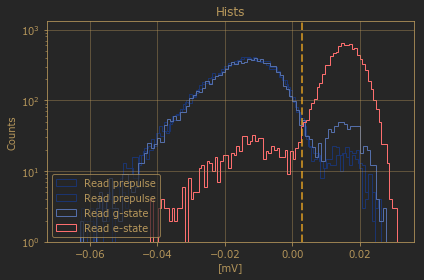

In [2]:
pic = m2.plot_hist_1D()

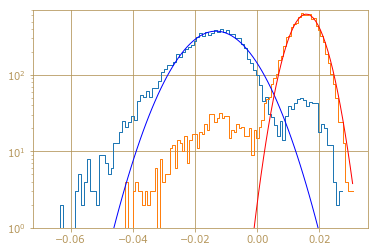

In [3]:
m2.make_histograms()
pic = m2.plot_hists_new()

In [4]:
m2.make_histograms()

True

In [5]:
m2.x_e_hist.do_the_fit(m2.threshold, m2.sign_ge)

AttributeError: Histogram instance has no attribute 'do_the_fit'